#Analisis Sentiment Vaksin Booster clustering kmeans

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 13.7 MB/s 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/bip (1).csv')
df_copy1 = df
df.head()

,Tanggal,User,Tweet
0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin😭
1,2022-08-04 15:32:06,soloposdotcom,Ratusan Nakes di Kota Madiun Mulai Disuntik Va...
2,2022-08-04 15:31:31,DepokGuide,RT @_Banyoe: Tiga dokter meninggal pasca disun...
3,2022-08-04 15:31:00,detik_sulsel,Pj Bupati Buteng Ancam Copot Kadis gegara ASN ...
4,2022-08-04 15:30:57,da_rull,"RT @Meilansyahriza: ""Jangan coba...SUAP SUAP s..."


In [ ]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data


In [ ]:
#jalankan cleansing data
review =[]
for index, row in df.iterrows():
    review.append(cleansing(row["Tweet"]))

df["Tweet"] = review

In [ ]:
df

,Tanggal,User,Tweet
0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin
1,2022-08-04 15:32:06,soloposdotcom,ratusan nakes di kota madiun mulai disuntik va...
2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter meninggal pasca disun...
3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kadis gegara asn ...
4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap s...
...,...,...,...
9995,2022-08-03 11:00:43,hekyie,eiandio kalau udah vaksin 3 enggak deh
9996,2022-08-03 11:00:23,honestutdfans,fadilah2737 pambudies inikevin wooww adek u...
9997,2022-08-03 11:00:10,jagapatidotcom,di saat kita baru izinin booster dari usia 16 ...
9998,2022-08-03 11:00:10,jagapatidotcom,hong kong turunkan batas minimum vaksin waji...


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
review = []
for index, row in df.iterrows():
     review.append(stopword.remove(row["Tweet"]))

df["Tweet"] = review

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [ ]:
review = []
for index, row in df.iterrows():
    word_tokens = word_tokenize((row["Tweet"]))
    #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)
    result_text = ' '.join(filtered_sentence)
    review.append(result_text)

df["Tweet"] = review

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()

In [ ]:
#implementasi pada data kita
review = []
for index, row in df.iterrows():
     review.append(Stemmer.stem(row["Tweet"]))

df["Tweet"] = review

In [ ]:
import re
for i in range(0,len(df['Tweet'])):
  df['Tweet'][i] = re.sub(' +', ' ',df['Tweet'][i])

In [ ]:
text = []
for i in range(0,len(df['Tweet'])):
  Tweet = df['Tweet'][i]
  text.append(Tweet)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(text)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X)

In [ ]:
label = kmeans.fit_predict(X)

In [ ]:
df['Sentimen'] = label

In [ ]:
df.head()

,Tanggal,User,Tweet,Sentimen
0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin,0
1,2022-08-04 15:32:06,soloposdotcom,ratus nakes kota madiun mulai suntik vaksin bo...,1
2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter tinggal pasca suntik vak...,0
3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kad gegara asn to...,1
4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap kalo m...,0


In [ ]:
df_copy1 = pd.read_csv('/content/bip (1).csv')

In [ ]:
df_copy1['Sentimen'] = label

In [ ]:
df_copy1.head()

,Tanggal,User,Tweet,Sentimen
0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin😭,0
1,2022-08-04 15:32:06,soloposdotcom,Ratusan Nakes di Kota Madiun Mulai Disuntik Va...,1
2,2022-08-04 15:31:31,DepokGuide,RT @_Banyoe: Tiga dokter meninggal pasca disun...,0
3,2022-08-04 15:31:00,detik_sulsel,Pj Bupati Buteng Ancam Copot Kadis gegara ASN ...,1
4,2022-08-04 15:30:57,da_rull,"RT @Meilansyahriza: ""Jangan coba...SUAP SUAP s...",0


In [ ]:
df.to_csv('bip_result_clustering.csv')

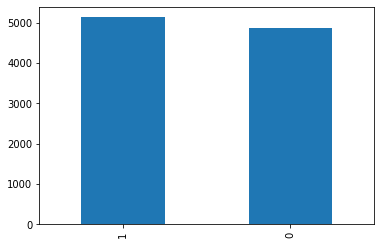

In [ ]:
df_copy1['Sentimen'].value_counts().plot.bar()

In [ ]:
df_copy1.to_csv('bip_result_clustering_and_labelling.csv')

#Analisis Sentiment Pantai Jumieng Madura

In [1]:
import pandas as pd

df = pd.read_csv('/content/pantai jumieng madura.csv')

In [2]:
df.head()

,tweeterbersih
0,pantai jumiang sunrisenya bagus
1,pantai jumiang
2,pantai jumiang d pamekasan
3,kirim video wisata pantai jumiang
4,kangen healing jumiang bareng weny pagi nikmat...


In [3]:
text = df['tweeterbersih']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(text)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X)

In [6]:
label = kmeans.fit_predict(X)

In [7]:
df['Label'] = label

In [8]:
df.head()

,tweeterbersih,Label
0,pantai jumiang sunrisenya bagus,0
1,pantai jumiang,0
2,pantai jumiang d pamekasan,1
3,kirim video wisata pantai jumiang,0
4,kangen healing jumiang bareng weny pagi nikmat...,0


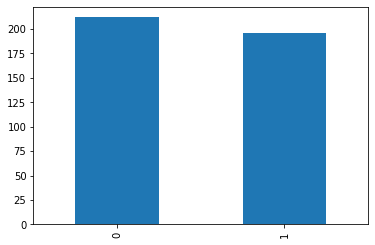

In [10]:
df['Label'].value_counts().plot.bar()

In [11]:
df.to_csv('/content/pantai_jumieng_madura_berlabel.csv')